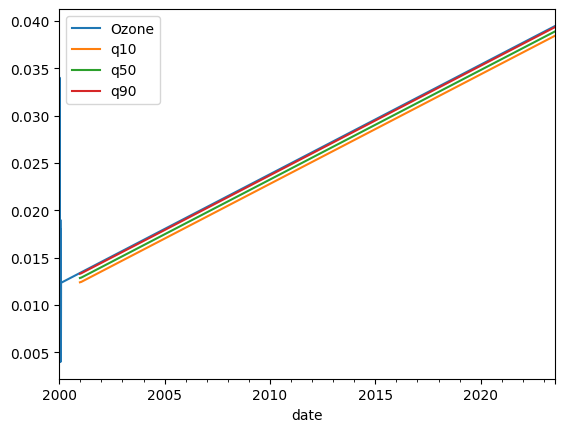

In [3]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
#data.info()

# Create the rolling window
rolling = data.rolling(360)['Ozone']

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

# Plot the data
data.plot()
plt.show()


[*********************100%***********************]  2 of 2 completed


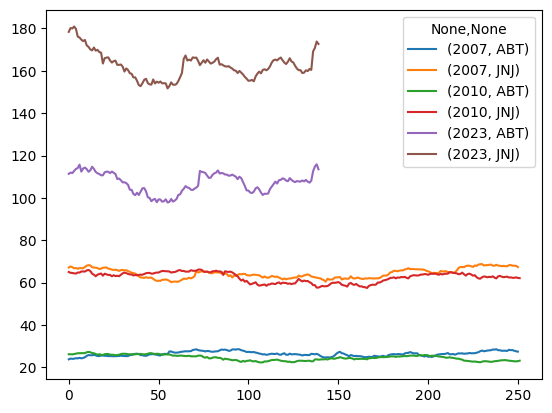

In [12]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
tickers = ['ABT', 'JNJ']
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(tickers,start=startdate, end=enddate ) 
# Create dataframe prices here
prices = pd.DataFrame()
#prices

## Select data(high/low/close/adj) for each year and concatenate with PRICES here 
for year in ['2007','2010','2023']:
    price_per_year = google.loc[year, ['High']].reset_index(drop=True)
    price_per_year.rename(columns={'High': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)


# Plot prices
prices.plot()
plt.show()



[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

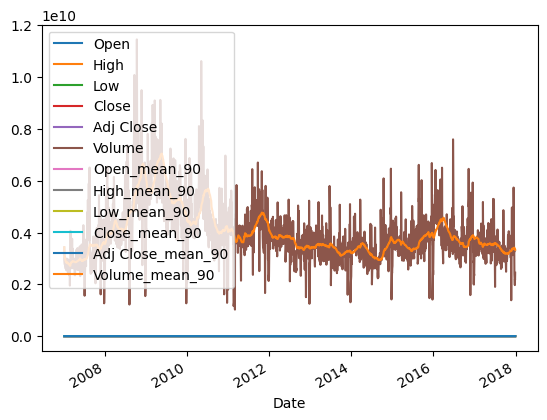

In [37]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
##setup data range
tickers = ['^GSPC'] #S&P500 symbol
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers,start=startdate, end=enddate ) 

## 90 DAY ROLLING MEAN
r90 = data.rolling(window='90D').mean()
data.join(r90.add_suffix('_mean_90')).plot()

In [6]:
## EXPANDING WINDOWS IN PANDAS
df = pd.DataFrame({'data': range(5)})
df['expanding sum'] = df.data.expanding().sum()
df['cumulative sum'] = df.data.cumsum()
df


,data,expanding sum,cumulative sum
0,0,0.0,0
1,1,1.0,1
2,2,3.0,3
3,3,6.0,6
4,4,10.0,10


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import and inspect ozone data here
data = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
#print(data.info())



[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

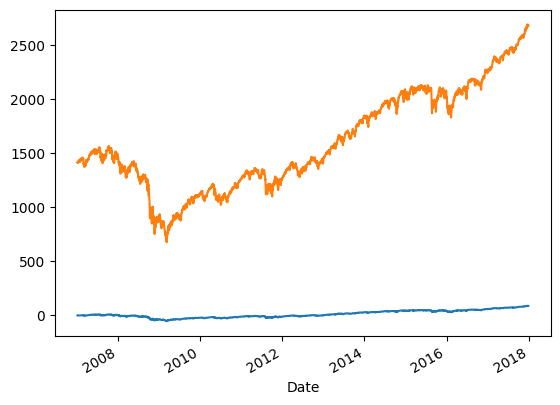

In [14]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['^GSPC'] #S&P500 symbol
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers,start=startdate, end=enddate ) 

## RUNNING RATE OF RETURN IN PRACTICE
pr = data['Close'].pct_change() # period return
pr_plus_one = pr.add(1)
cumulative_return = pr_plus_one.cumprod().sub(1)
cumulative_return.mul(100).plot()

## GETTING THE RUNNING MIN & MAX
data['running_min'] = data['Close'].expanding().min()
data['running_max'] = data['Close'].expanding().max()
data['Close'].plot()

# Plot prices
#data['Close'].plot()
#plt.show()



[*********************100%***********************]  1 of 1 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

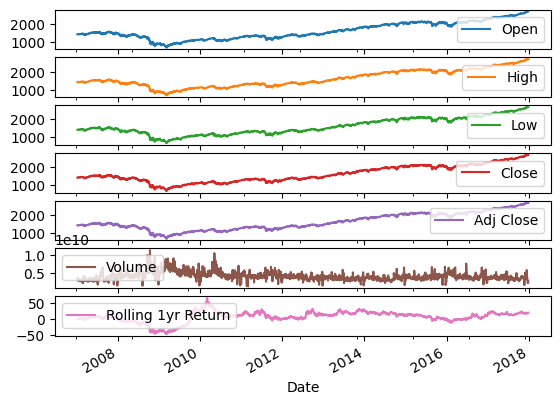

In [28]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['^GSPC'] #S&P500 symbol
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers,start=startdate, end=enddate) 

## ROLLING ANNUAL RATE OF RETURN
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

pr = data['Close'].pct_change() # period return
r = pr.rolling('360D').apply(multi_period_return)
data['Rolling 1yr Return'] = r.mul(100)
data.plot(subplots = True)